In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
sales = pd.read_csv("SalesData.csv")
sales

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3704,7576,Account2736,East,EMPIRE,SYRACUSE,NY,Out,Feb,3684.48,0.00,1.0,0.0,1.06,1.14
3705,4969,Account2740,Central,SOUTHERN STAR,MONTGOMERY,AL,Med,Aug,3684.48,0.00,1.0,0.0,0.96,1.11
3706,2850,Account2746,East,SYNERGY,ASHEVILLE,NC,High,Nov,5067.70,0.00,2.0,0.0,1.11,1.55
3707,1102265,Account2748,West,DIAMONDBACK,SCOTTSDALE,AZ,Out,Jan,3684.48,0.00,1.0,0.0,1.31,1.48


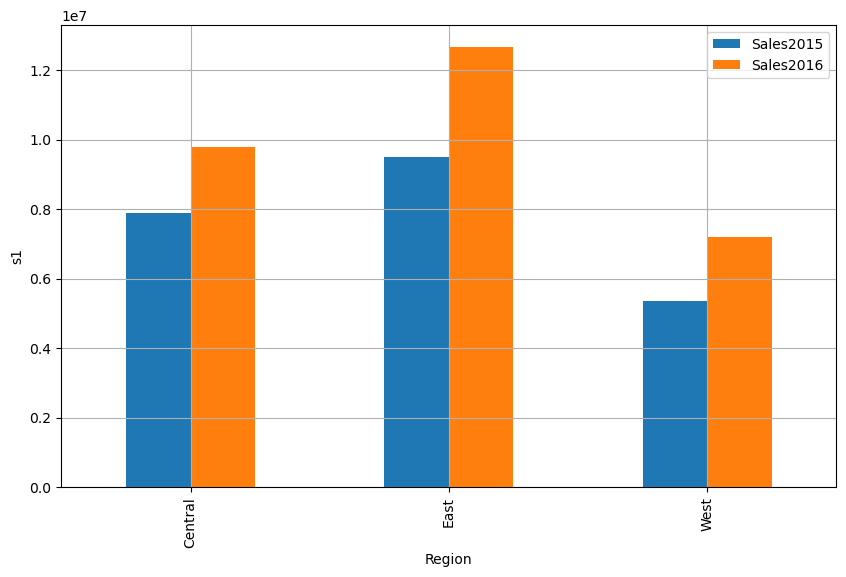

In [3]:
# Question 1
s1 = pd.pivot_table(sales,values = ["Sales2015","Sales2016"],index="Region" ,aggfunc="sum")
s1.plot(kind = "bar",figsize =(10,6),grid =True)
plt.ylabel("s1")
plt.legend()
plt.show()

<AxesSubplot:ylabel='Sales2016'>

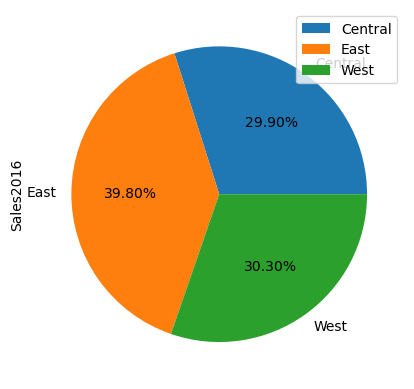

In [4]:
# Question 2
s2 = pd.pivot_table(sales,values="Sales2016",index ="Region")
s2.plot(y="Sales2016",kind="pie",autopct = "%1.2f%%")

([<matplotlib.patches.Wedge at 0x1870c270070>,
 [Text(0.7082836442350329, 0.9686765607307434, 'Central'),
  Text(-1.1999091258251227, 0.014767862458396626, 'East'),
  Text(0.6963088469756751, -0.9773197990542328, 'West')],
 [Text(0.4131654591371025, 0.5650613270929336, '29.90%'),
  Text(-0.6999469900646549, 0.008614586434064698, '39.80%'),
  Text(0.4061801607358104, -0.5701032161149691, '30.30%')])

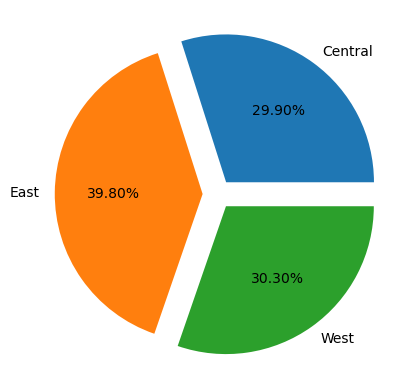

In [5]:
plt.pie(x=s2.Sales2016,explode=[0.1,0.1,0.1],labels = s2.index,autopct="%1.2f%%")

In [6]:
# Question 3
s3 = Region_tier_sales =sales[["Region","Tier","Sales2015","Sales2016"]].pivot_table(index="Region",columns="Tier",values=["Sales2015","Sales2016"])
s3.head()

Sales2015                                            Sales2016  \
Tier            High          Low          Med          Out          High   
Region                                                                      
Central  6519.970693  3430.689709  5926.148610  5811.777857   8187.558342   
East     8224.994771  5094.157062  6041.559951  4663.318750  10535.244070   
West     5819.741621  3531.917789  5747.411104  3853.770000   7446.716107   

                                               
Tier             Low          Med         Out  
Region                                         
Central  4119.392182  7542.067253 -232.037857  
East     6468.528757  9059.045868    0.000000  
West     5786.853579  7833.273900    0.000000

<AxesSubplot:title={'center':'Sales of 2015 &2016 with region and Tiers'}, xlabel='Region', ylabel='Sales'>

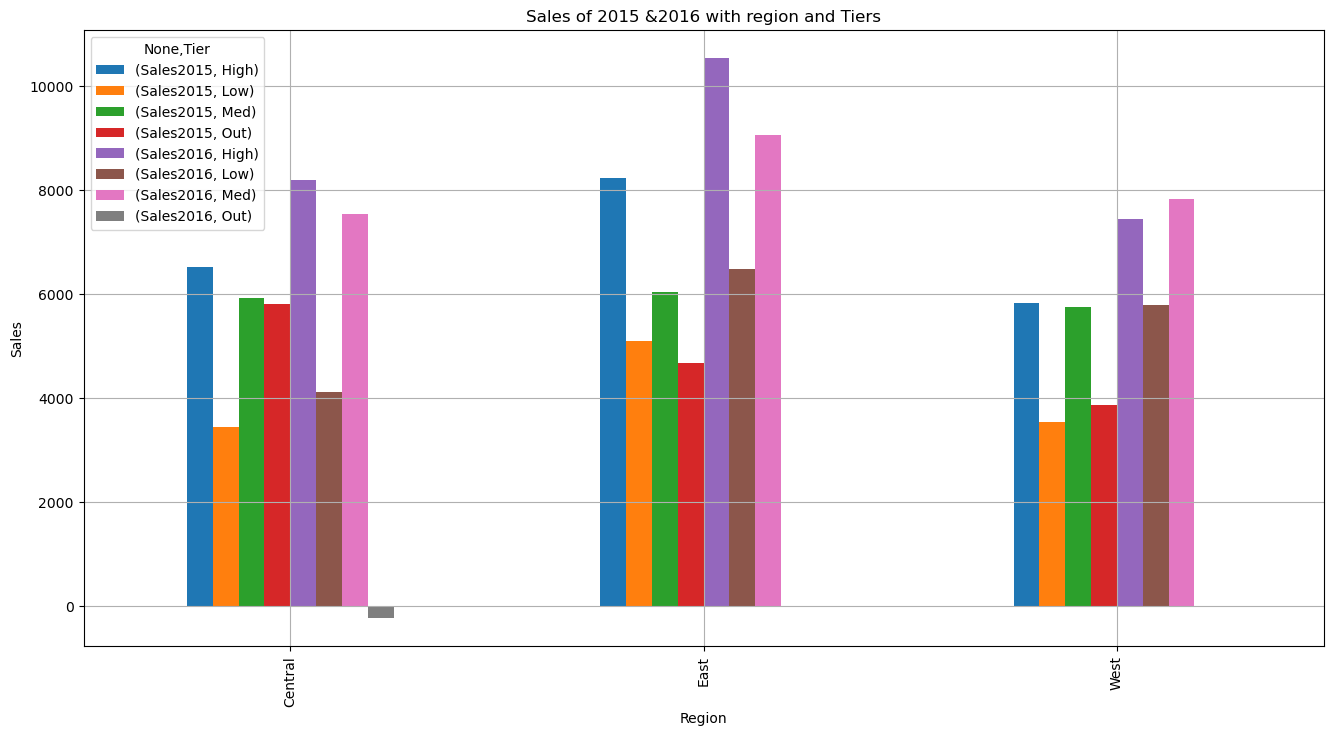

In [7]:
s3.plot.bar(figsize = (16,8), ylabel = "Sales",title ="Sales of 2015 &2016 with region and Tiers",grid = "True")

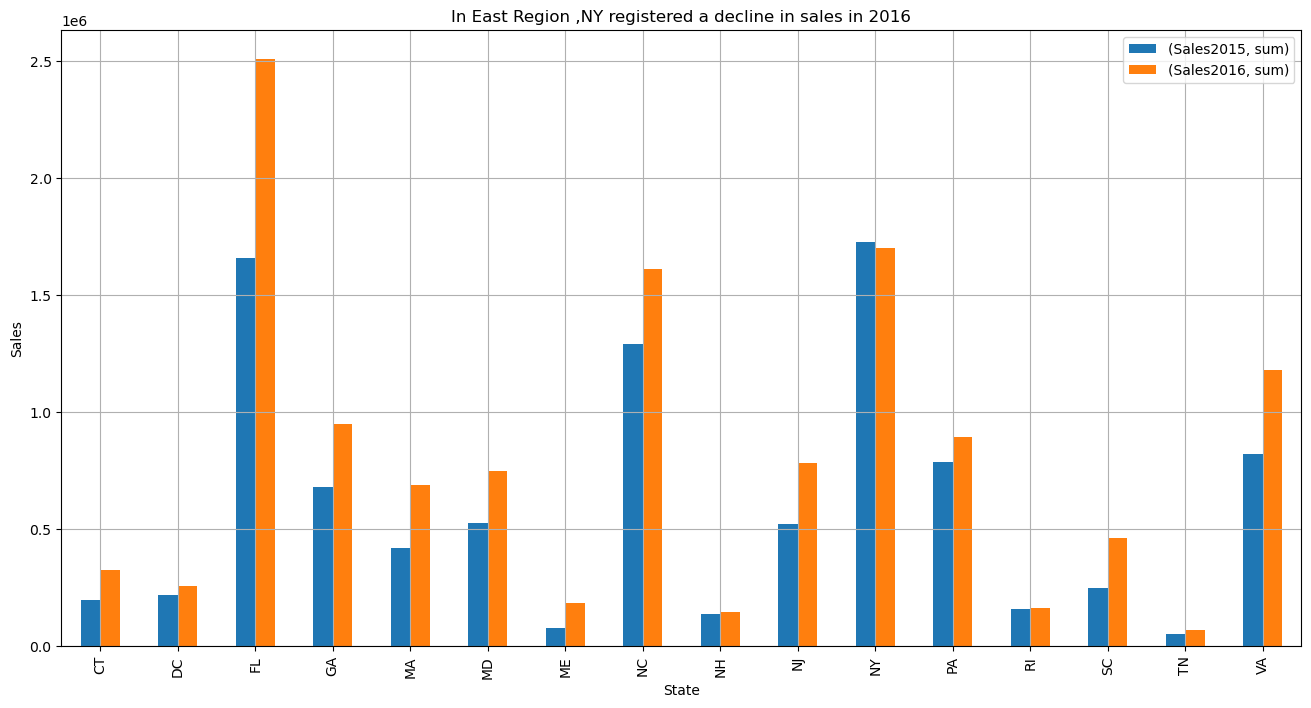

In [8]:
# Question 4
s4 = sales.loc[(sales.Region == "East")]
s4 = s4.groupby(["State"]).aggregate({"Sales2015":["sum"],"Sales2016":["sum"]})

s4graph = s4.plot.bar(figsize =(16,8),grid =True)
plt.legend()
plt.ylabel("Sales")
plt.title("In East Region ,NY registered a decline in sales in 2016")
plt.show()

In [9]:
# Question 5
s5 = sales[["Division","Tier","Units2015","Units2016"]].loc[sales.Tier == "High",:].groupby("Division").sum(["Units2015","Units2016"])
s5

,Units2015,Units2016
Division,,
BIG APPLE,180.8330,231.0000
CHARGERS,123.6666,164.4999
CONGRESSIONAL,164.5003,205.0000
DIAMONDBACK,153.3334,176.6667
EMPIRE,414.3332,449.3332
GRIDIRON,213.6673,246.1675
GULF STREAM,185.0000,301.0009
HAILSTORM,187.8338,247.0003
KINETIC,214.3334,244.5001


<AxesSubplot:xlabel='Division', ylabel='Sales'>

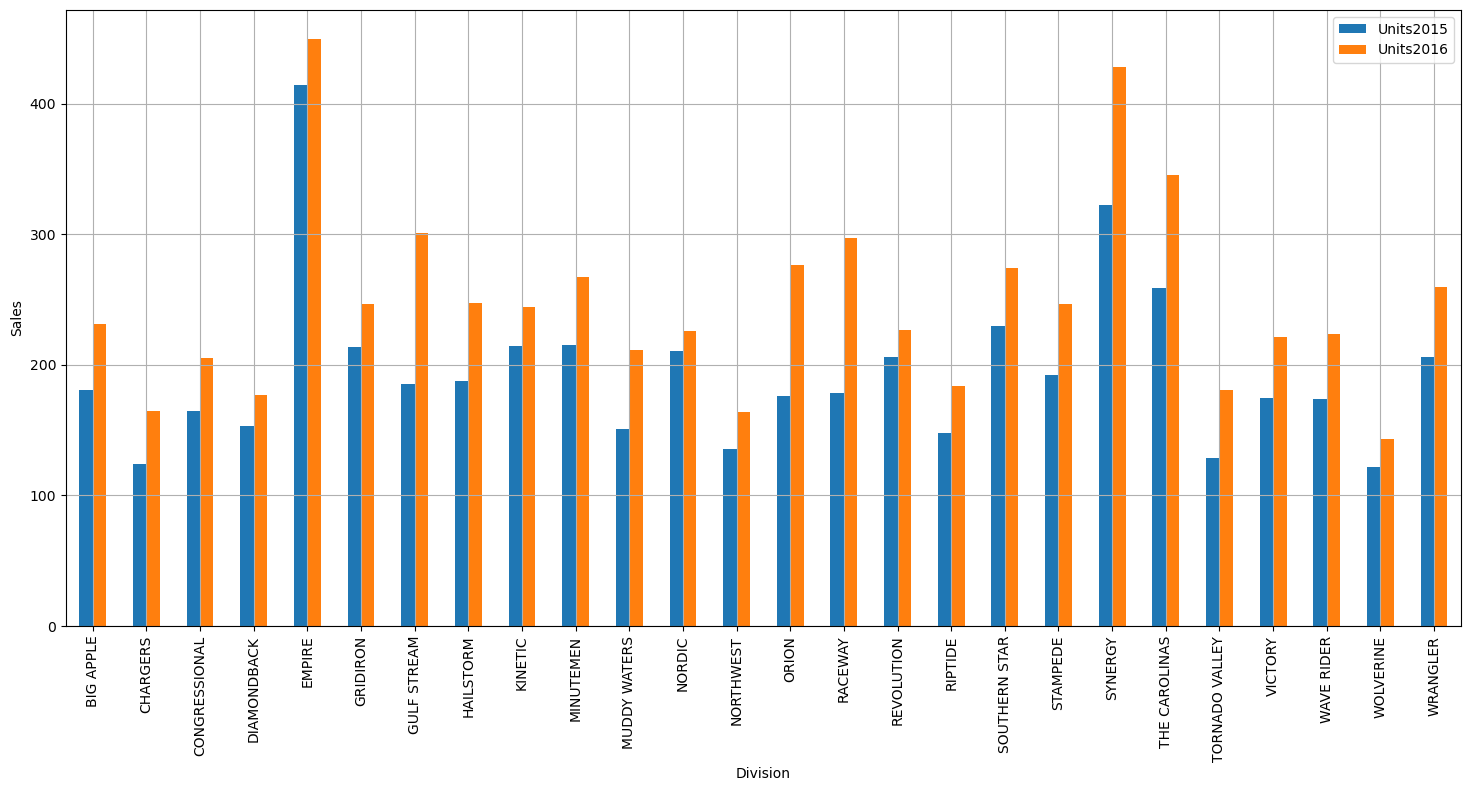

In [10]:
s5.plot.bar(y=["Units2015","Units2016"],figsize =(18,8),ylabel ="Sales",grid=True)

In [11]:
# Question 6
s6 =sales["Qtr"] = np.where(sales.Month.isin(["Jan","Feb","Mar"]),"Q1",
                np.where (sales.Month.isin(["Apr","May","Jun"]),"Q2",
                np.where(sales.Month.isin(["Jul","Aug","Sep"]),"Q3","Q4")))
sales.head(15)

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016,Qtr
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53,Q3
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31,Q4
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29,Q2
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17,Q1
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53,Q3
5,2400,Account4,East,MINUTEMEN,PORTLAND,ME,High,Jul,0.00,10525.24,0.0,4.0,1.03,1.45,Q3
6,2400,Account4,East,MINUTEMEN,PORTLAND,ME,High,Feb,2631.31,42812.62,1.0,17.0,1.08,0.99,Q1
7,2404,Account5,East,EMPIRE,BRIDGEPORT,CT,Low,Mar,4153.89,3918.77,1.0,1.0,0.79,1.46,Q1
8,2406,Account6,East,BIG APPLE,JERSEY CITY,NJ,Med,Mar,0.00,6951.86,0.0,2.0,1.12,1.02,Q1
9,2408,Account7,East,BIG APPLE,JERSEY CITY,NJ,High,Aug,0.00,10994.54,0.0,4.0,1.11,1.54,Q3


In [12]:
# Question 7
s7 =sales [["Qtr","Sales2015","Sales2016"]].groupby("Qtr").sum(["Sales2015","Sales2016"]).reset_index()
s7

,Qtr,Sales2015,Sales2016
0,Q1,5.485800e+06,6.997953e+06
1,Q2,5.390862e+06,7.237361e+06
2,Q3,6.164094e+06,7.861546e+06
3,Q4,5.713634e+06,7.567868e+06


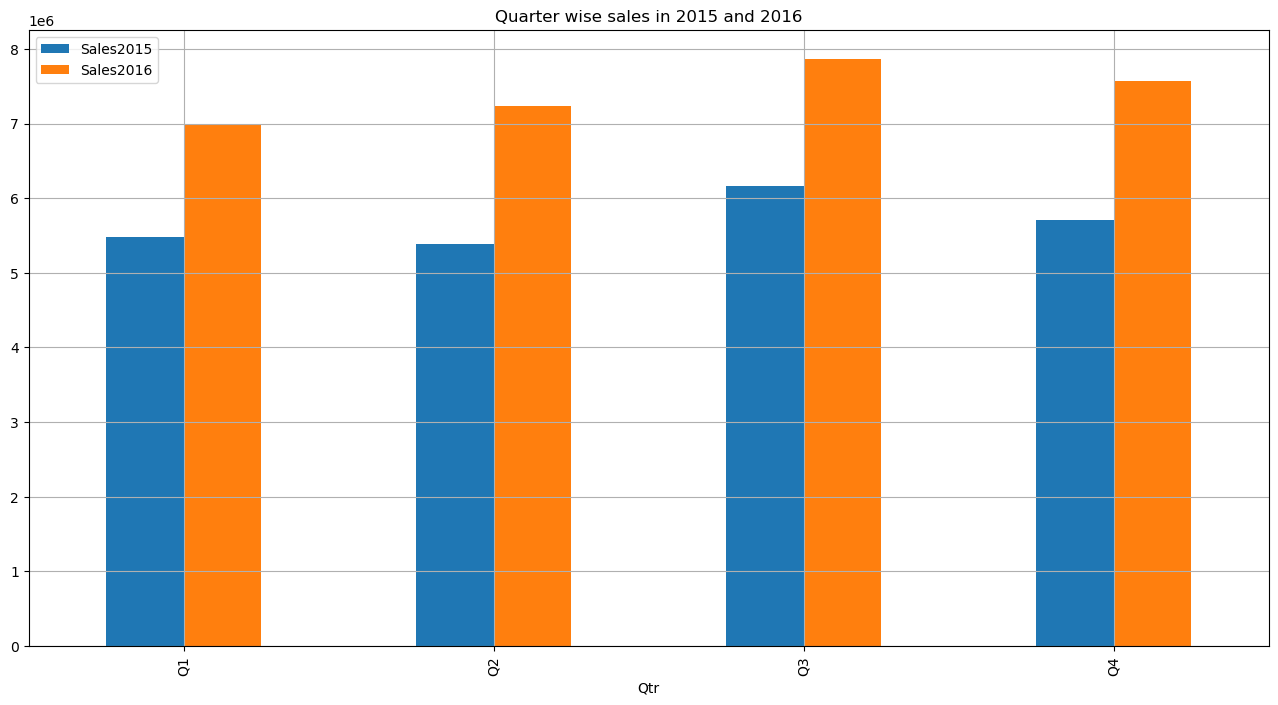

In [24]:
s7.plot.bar(y=["Sales2015","Sales2016"], x = "Qtr" ,title="Quarter wise sales in 2015 and 2016" ,figsize = (16,8),grid=True)
plt.show()

In [15]:
# Question 8
sales.Sales2015 =np.where(sales.Sales2015<0,0,sales.Sales2015)

In [16]:
s8 = pd.pivot_table(data =sales,index = "Tier",columns="Qtr",values = "Sales2015",aggfunc ="sum")

In [17]:
s9 =s8["Q1"]
s10=s8["Q2"]
s11=s8["Q3"]
s12=s8["Q4"]

Text(0.5, 1.0, 'Q4')

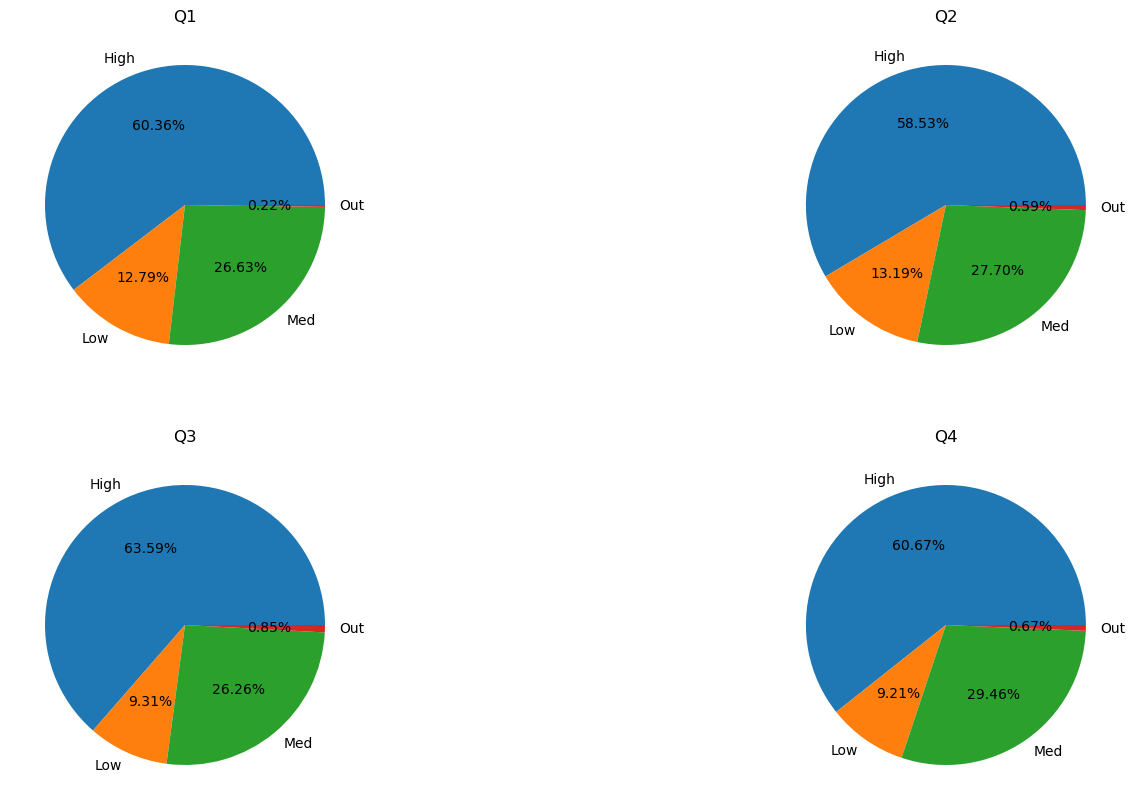

In [21]:
fig=plt.figure(figsize =(18,10))
#1
ax= plt.subplot2grid((2,2),(0,0))
plt.pie(data =s9,x=s9.values,autopct ="%0.2f%%",labels =s9.index)
plt.title("Q1")
#2
ax = plt.subplot2grid((2,2),(0,1))
plt.pie(data=s10,x=s10.values,autopct="%0.2f%%",labels=s10.index)
plt.title("Q2")
#3
ax =plt.subplot2grid((2,2),(1,0))
plt.pie(data=s11,x=s11.values,autopct ="%0.2f%%",labels=s11.index)
plt.title("Q3")

#4
ax = plt.subplot2grid((2,2),(1,1))
plt.pie(data=s12,x=s12.values,autopct="%0.2f%%",labels=s12.index)
plt.title("Q4")